In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

# STO simulation data part

## Load raw data, denoised data, and truth

In [46]:
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_cropped/STO/'

raw_data = sio.loadmat('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
STO/Simulation_noisy_STO_slice_5_1000FPS_cropped_100layers.mat')
raw_data = raw_data['datacube']

truth_data = np.load('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
STO/Simulation_truth_STO_slice_5_1000FPS_cropped_100layers.npy')

tensor_denoised = sio.loadmat(path + 'Simulation_tensor_STO_slice_5_1000FPS_cropped_100layers.mat')
tensor_denoised = tensor_denoised['est_HOOI']

NLPCA_denoised = sio.loadmat(path + 'Simulation_NLPCA_STO_slice_5_1000FPS_cropped_100layers.mat')
NLPCA_denoised = NLPCA_denoised['est_NLPCA']

BM4D_denoised = sio.loadmat(path + 'Simulation_BM4D_STO_slice_5_1000FPS_cropped_100layers.mat')
BM4D_denoised = BM4D_denoised['est_BM4D']

PCA_denoised = path + 'Simulation_PCA_STO_slice_5_1000FPS_cropped_100layers.npy'
PCA_denoised = np.load(PCA_denoised)

## Calculate PSNR for three methods under different frame rates

In [47]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
PSNR_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/STO/Simulation_truth_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/STO/Simulation_noisy_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_NLPCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/STO/Simulation_BM4D_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/STO/Simulation_tensor_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/STO/Simulation_PCA_STO_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    PSNR_list[0,i] = averagePSNR(tensor_file,truth_file,0)
    PSNR_list[1,i] = averagePSNR(NLPCA_file,truth_file,0)
    PSNR_list[2,i] = averagePSNR(BM4D_file,truth_file,0)
    PSNR_list[3,i] = averagePSNR(noisy_file,truth_file,0)
    PSNR_list[4,i] = averagePSNR(tensor_file_optimized, truth_file, 0)
    PSNR_list[5,i] = averagePSNR(PCA_file, truth_file, 0)

    
    print(FPS)
    print(PSNR_list[:,i])

1000
[38.09424202 37.02989815 26.29106367 13.79448768 39.0653481  24.75884417]
2000
[36.19586053 34.59476173 24.01751373 10.78946685 36.58854385 21.63563622]
4000
[34.18042908 32.18542403 21.87983227  7.77969859 34.18042908 18.74482649]
6000
[32.6260035  30.33267963 20.6894332   6.02372421 32.6260035  16.99357571]
8000
[31.67351117 28.78548936 19.84872194  4.78197595 31.67351117 15.66039087]
10000
[30.77791913 28.15958308 19.1815876   3.81396345 30.77791913 14.77464475]
20000
[27.55322967 25.42280943 16.98990168  0.83202644 27.55546323 11.69854331]
40000
[24.23794666 23.14076714 13.9787451  -2.13467046 25.08191624  8.71189477]


Text(0.5, 1.0, 'STO data')

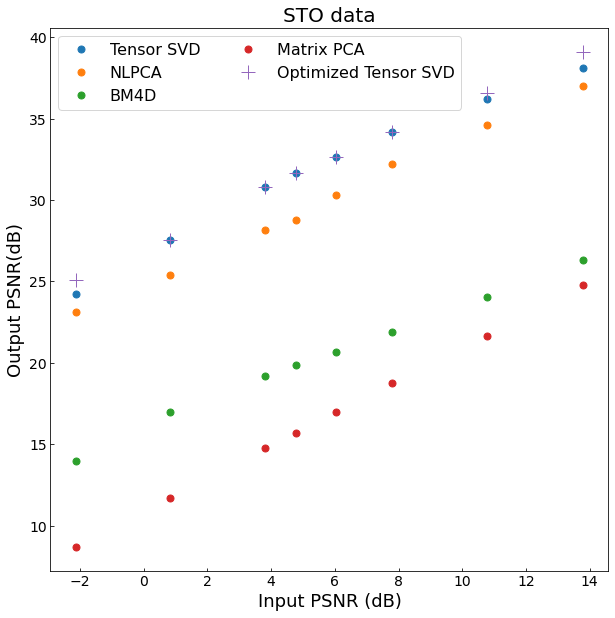

In [48]:
fig = plt.figure(figsize=(10,10))
ax3 = plt.subplot(111)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], '.',markersize=14, label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor SVD')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
plt.title('STO data', fontsize=20)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')
# plt.ylim([15,40])

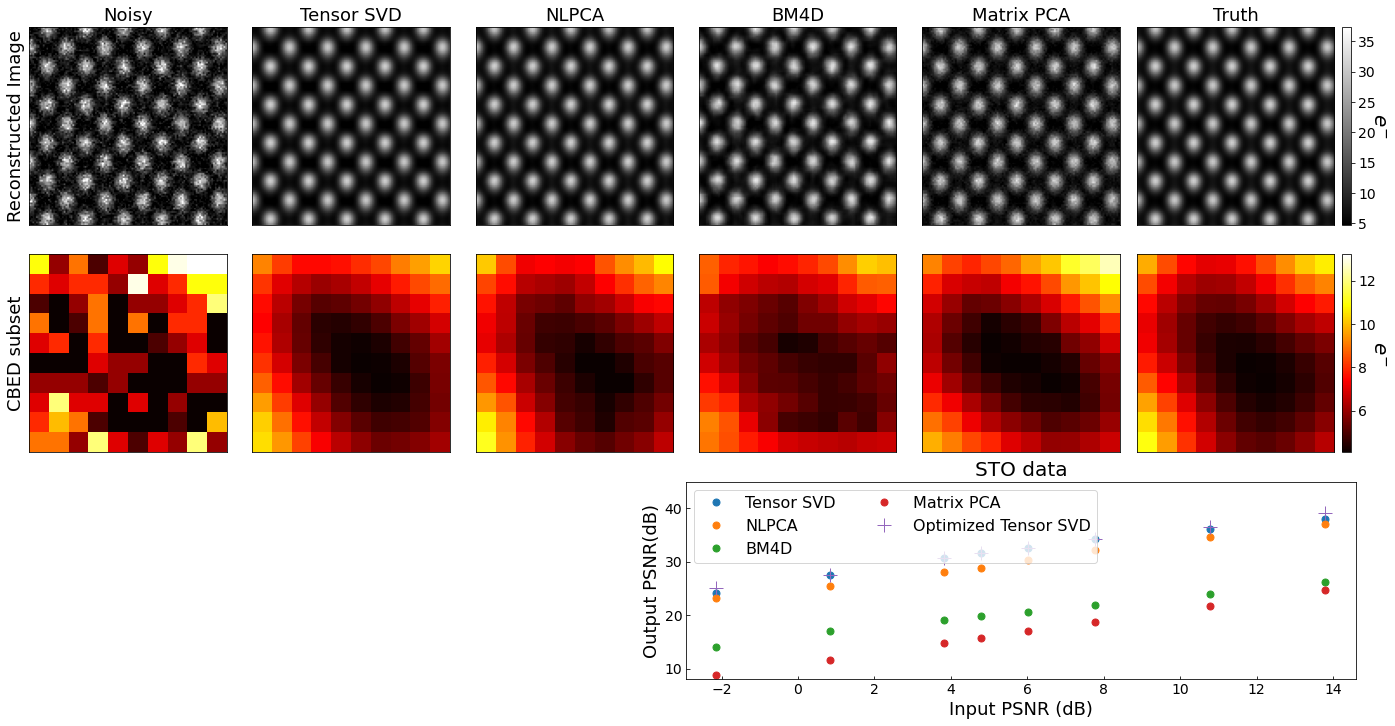

In [49]:
# overall plot
fig = plt.figure(figsize=(24,12))
iframe = 50
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])


ax = fig.add_subplot(361)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
plt.ylabel('Reconstructed Image', fontsize=18)
# ax.text(95,105,'a',fontsize=25, color='white', fontweight='bold')


ax = fig.add_subplot(362)
plt.imshow(tensor_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Tensor SVD',fontsize=18)
# ax.text(95,105,'b',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(363)
plt.imshow(NLPCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('NLPCA',fontsize=18)
# ax.text(95,105,'c',fontsize=25, color='white', fontweight='bold')


ax = fig.add_subplot(364)
plt.imshow(BM4D_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('BM4D',fontsize=18)
# ax.text(95,105,'d',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(365)
plt.imshow(PCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Matrix PCA',fontsize=18)

ax = fig.add_subplot(366)
im = ax.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Truth',fontsize=18)
# ax.text(95,105,'e',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)

# plot subset of CBED patterns
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

ax = fig.add_subplot(367)
plt.imshow(raw_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('CBED subset', fontsize=18)
# ax.text(8,8,'f',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(368)
plt.imshow(tensor_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'g',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'1.4 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(369)
plt.imshow(NLPCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'h',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'539.1 sec',fontsize=25, color='white', fontweight='bold')

ax = fig.add_subplot(3,6,10)
plt.imshow(BM4D_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'i',fontsize=25, color='white', fontweight='bold')
# ax.text(0,8,'249.5 sec',fontsize=25, color='white', fontweight='bold')
ax = fig.add_subplot(3,6,11)
im = plt.imshow(PCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(3,6,12)
im = plt.imshow(truth_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'j',fontsize=25, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 12)

ax3 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], '.',markersize=14, label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor SVD')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
plt.title('STO data', fontsize=20)
plt.ylim([8,45])

fig.subplots_adjust(wspace = 0.0, hspace = 0.15)
fig.savefig('D:/2020/TensorSVD/ManuscriptRelated/Figures/FigureFromPython/STO_DiffMethods.tif')

# Si dislocation part

## Load raw data, denoised data, and truth

In [50]:
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_cropped/SiDislocation/'

raw_data = sio.loadmat('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
SiDislocation/Simulation_noisy_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
raw_data = raw_data['datacube']

truth_data = np.load('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/\
SiDislocation/Simulation_truth_SiDisl_slice_5_1000FPS_cropped_100layers.npy')

tensor_denoised = sio.loadmat(path + 'Simulation_tensor_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
tensor_denoised = tensor_denoised['est_HOOI']

NLPCA_denoised = sio.loadmat(path + 'Simulation_NLPCA_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
NLPCA_denoised = NLPCA_denoised['est_NLPCA']

BM4D_denoised = sio.loadmat(path + 'Simulation_BM4D_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
BM4D_denoised = BM4D_denoised['est_BM4D']

PCA_denoised = path + 'Simulation_PCA_SiDisl_slice_5_1000FPS_cropped_100layers.npy'
PCA_denoised = np.load(PCA_denoised)

## Calculate PSNR for different methods under different frame rates

In [51]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
PSNR_list = np.zeros((6,len(FPS_list)))
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_truth_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    truth_file = np.load(truth_file)
    
    noisy_file = path + 'DenoiseInput_cropped/SiDislocation/Simulation_noisy_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']
    
    tensor_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    tensor_file = sio.loadmat(tensor_file)
    tensor_file = tensor_file['est_HOOI']
    
    NLPCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_NLPCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    NLPCA_file = sio.loadmat(NLPCA_file)
    NLPCA_file = NLPCA_file['est_NLPCA']
    
    BM4D_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_BM4D_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.mat'
    BM4D_file = sio.loadmat(BM4D_file)
    BM4D_file = BM4D_file['est_BM4D']
    
    tensor_file_optimized = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_tensor_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers_optimized.mat'
    tensor_file_optimized = sio.loadmat(tensor_file_optimized)
    tensor_file_optimized = tensor_file_optimized['est_HOOI']
    
    PCA_file = path + 'DenoiseOutput_cropped/SiDislocation/Simulation_PCA_SiDisl_slice_5_'+str(FPS)+'FPS_cropped_100layers.npy'
    PCA_file = np.load(PCA_file)
    
    PSNR_list[0,i] = averagePSNR(tensor_file,truth_file,0)
    PSNR_list[1,i] = averagePSNR(NLPCA_file,truth_file,0)
    PSNR_list[2,i] = averagePSNR(BM4D_file,truth_file,0)
    PSNR_list[3,i] = averagePSNR(noisy_file,truth_file,0)
    PSNR_list[4,i] = averagePSNR(tensor_file_optimized,truth_file,0)
    PSNR_list[5,i] = averagePSNR(PCA_file, truth_file, 0)
    
    print(FPS)
    print(PSNR_list[:,i])
#     print(PSNR_list[1,i])

1000
[33.95978402 35.36467741 29.46773043 16.16721989 36.18514184 27.41477881]
2000
[32.6916904  34.17924556 27.21799282 13.15491758 33.74210757 24.45768038]
4000
[30.80684304 32.23305477 24.95149901 10.13553394 31.16712473 21.41186073]
6000
[29.12205185 31.21037893 23.59685545  8.38925833 29.74272417 19.60030498]
8000
[28.08569922 30.36828863 22.56840477  7.15457256 28.85180278 18.32175692]
10000
[27.15494943 29.47862375 21.8513982   6.18284758 28.18096126 17.32598168]
20000
[23.71148832 27.27251401 19.164       3.18723241 25.8144465  14.2811588 ]
40000
[20.45936746 25.06292066 15.92311845  0.20134993 23.53953569 11.25171951]


Text(0.5, 1.0, 'Si dislocation data')

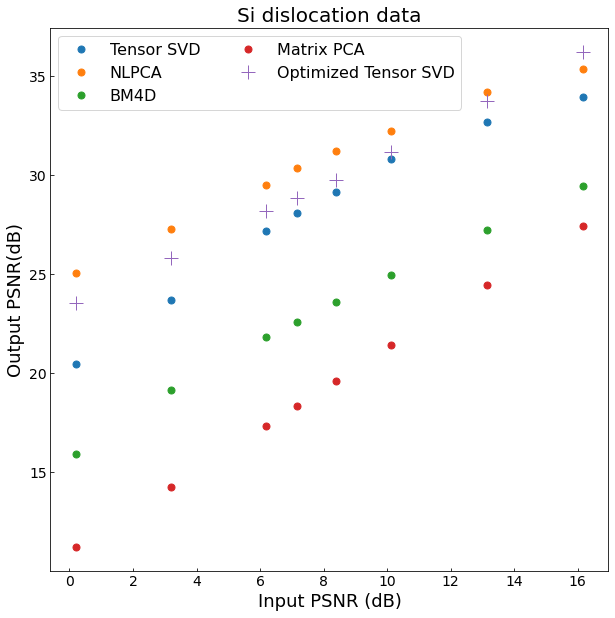

In [42]:
fig = plt.figure(figsize=(10,10))
ax3 = plt.subplot(111)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], '.',markersize=14, label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor SVD')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
plt.title('Si dislocation data', fontsize=20)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')
# plt.ylim([15,40])

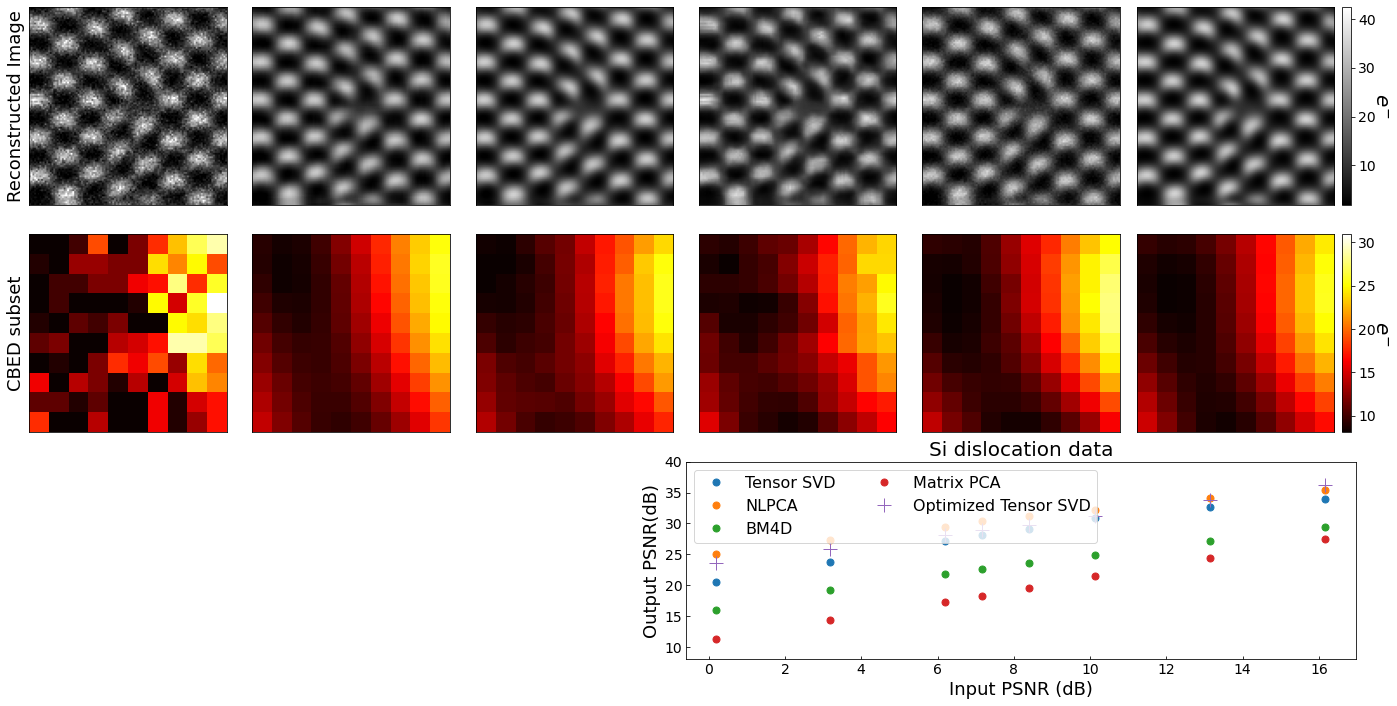

In [52]:
# overall plot
fig = plt.figure(figsize=(24,12))
iframe = 50
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])


ax = fig.add_subplot(361)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.ylabel('Reconstructed Image', fontsize=18)
# ax.text(90,105,'k',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(362)
plt.imshow(tensor_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'l',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(363)
plt.imshow(NLPCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'m',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(364)
plt.imshow(BM4D_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'n',fontsize=45, color='white', fontweight='bold')

ax = fig.add_subplot(365)
plt.imshow(PCA_denoised[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'n',fontsize=45, color='white', fontweight='bold')


ax = fig.add_subplot(366)
im = ax.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
# ax.text(90,105,'o',fontsize=45, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 14)

# plot subset of CBED patterns
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

ax = fig.add_subplot(367)
plt.imshow(raw_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('CBED subset', fontsize=18)
# ax.text(8,8,'p',fontsize=45, color='white', fontweight='bold')

ax = fig.add_subplot(368)
plt.imshow(tensor_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'q',fontsize=45, color='white', fontweight='bold')
# ax.text(0,8,'1.0 sec',fontsize=25, color='white')

ax = fig.add_subplot(369)
plt.imshow(NLPCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'r',fontsize=45, color='white', fontweight='bold')
# ax.text(0,8,'779.9 sec',fontsize=25, color='white')

ax = fig.add_subplot(3,6,10)
plt.imshow(BM4D_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'s',fontsize=45, color='white', fontweight='bold')
# ax.text(0,8,'145.3 sec',fontsize=25, color='white')

ax = fig.add_subplot(3,6,11)
im = plt.imshow(PCA_denoised[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(3,6,12)
im = plt.imshow(truth_data[rx,ry,:].reshape(10,10),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# ax.text(8,8,'t',fontsize=45, color='white', fontweight='bold')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$e^{-}$',rotation=270,fontsize=20, labelpad = 14)

ax3 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
ax3.plot(PSNR_list[3,:], PSNR_list[0,:], '.',markersize=14, label = 'Tensor SVD')
ax3.plot(PSNR_list[3,:], PSNR_list[1,:], '.',markersize=14, label = 'NLPCA')
ax3.plot(PSNR_list[3,:], PSNR_list[2,:], '.',markersize=14, label = 'BM4D')
ax3.plot(PSNR_list[3,:], PSNR_list[5,:], '.',markersize=14, label = 'Matrix PCA')
ax3.plot(PSNR_list[3,:], PSNR_list[4,:], '+', markersize=14, label = 'Optimized Tensor SVD')
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)

plt.legend(fontsize=16, loc='upper left',ncol=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=16)
ax3.tick_params(direction='in',labelsize = 14)
plt.title('Si dislocation data', fontsize=20)
# ax3.text(15,17,'v',fontsize=45, color='black', fontweight='bold')
# ax3.text(6,17,'Si dislocation data denoise',fontsize=20, color='black')
plt.ylim([8,40])

fig.subplots_adjust(wspace = 0.0, hspace = 0.15)
fig.savefig('D:/2020/TensorSVD/ManuscriptRelated/Figures/FigureFromPython/SiDisl_DiffMethods.tif')

In [3]:
def psnr(truth, denoise):
    mse = np.mean( (truth - denoise) ** 2 )
    PIXEL_MAX = np.amax(truth)
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [37]:
# transpose_option = 1 for tensor denoised data, where first dimension is for rec space and need to be transposed to match simulation
# transpose_option = 0 for noisy data, third dimension is for rec space and no need to transpose
def averagePSNR(denoised_data,truth_data,transpose_option):
    nlayer = truth_data.shape[2]
    side = np.sqrt(nlayer)
    side = int(side)
    psnr_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
    for irow in range(truth_data.shape[0]):
        for icol in range(truth_data.shape[1]):
            truth = truth_data[irow,icol,:].reshape(side,side)
            if transpose_option == 1:
                denoise = np.transpose(denoised_data[:,irow,icol].reshape(side,side))
            else:
                denoise = denoised_data[irow,icol,:].reshape(side,side)
            psnr_map[irow,icol] = psnr(truth,denoise)
    return np.mean(psnr_map)